In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**READ DATASET**

In [165]:
country_data = pd.read_csv('/Users/purnendubikashjana/Downloads/Country-data.csv')

**EDA**

In [166]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [167]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [168]:
country_data.shape

(167, 10)

In [169]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [170]:
country_data.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [171]:
country_data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


**VISUALIZATION**

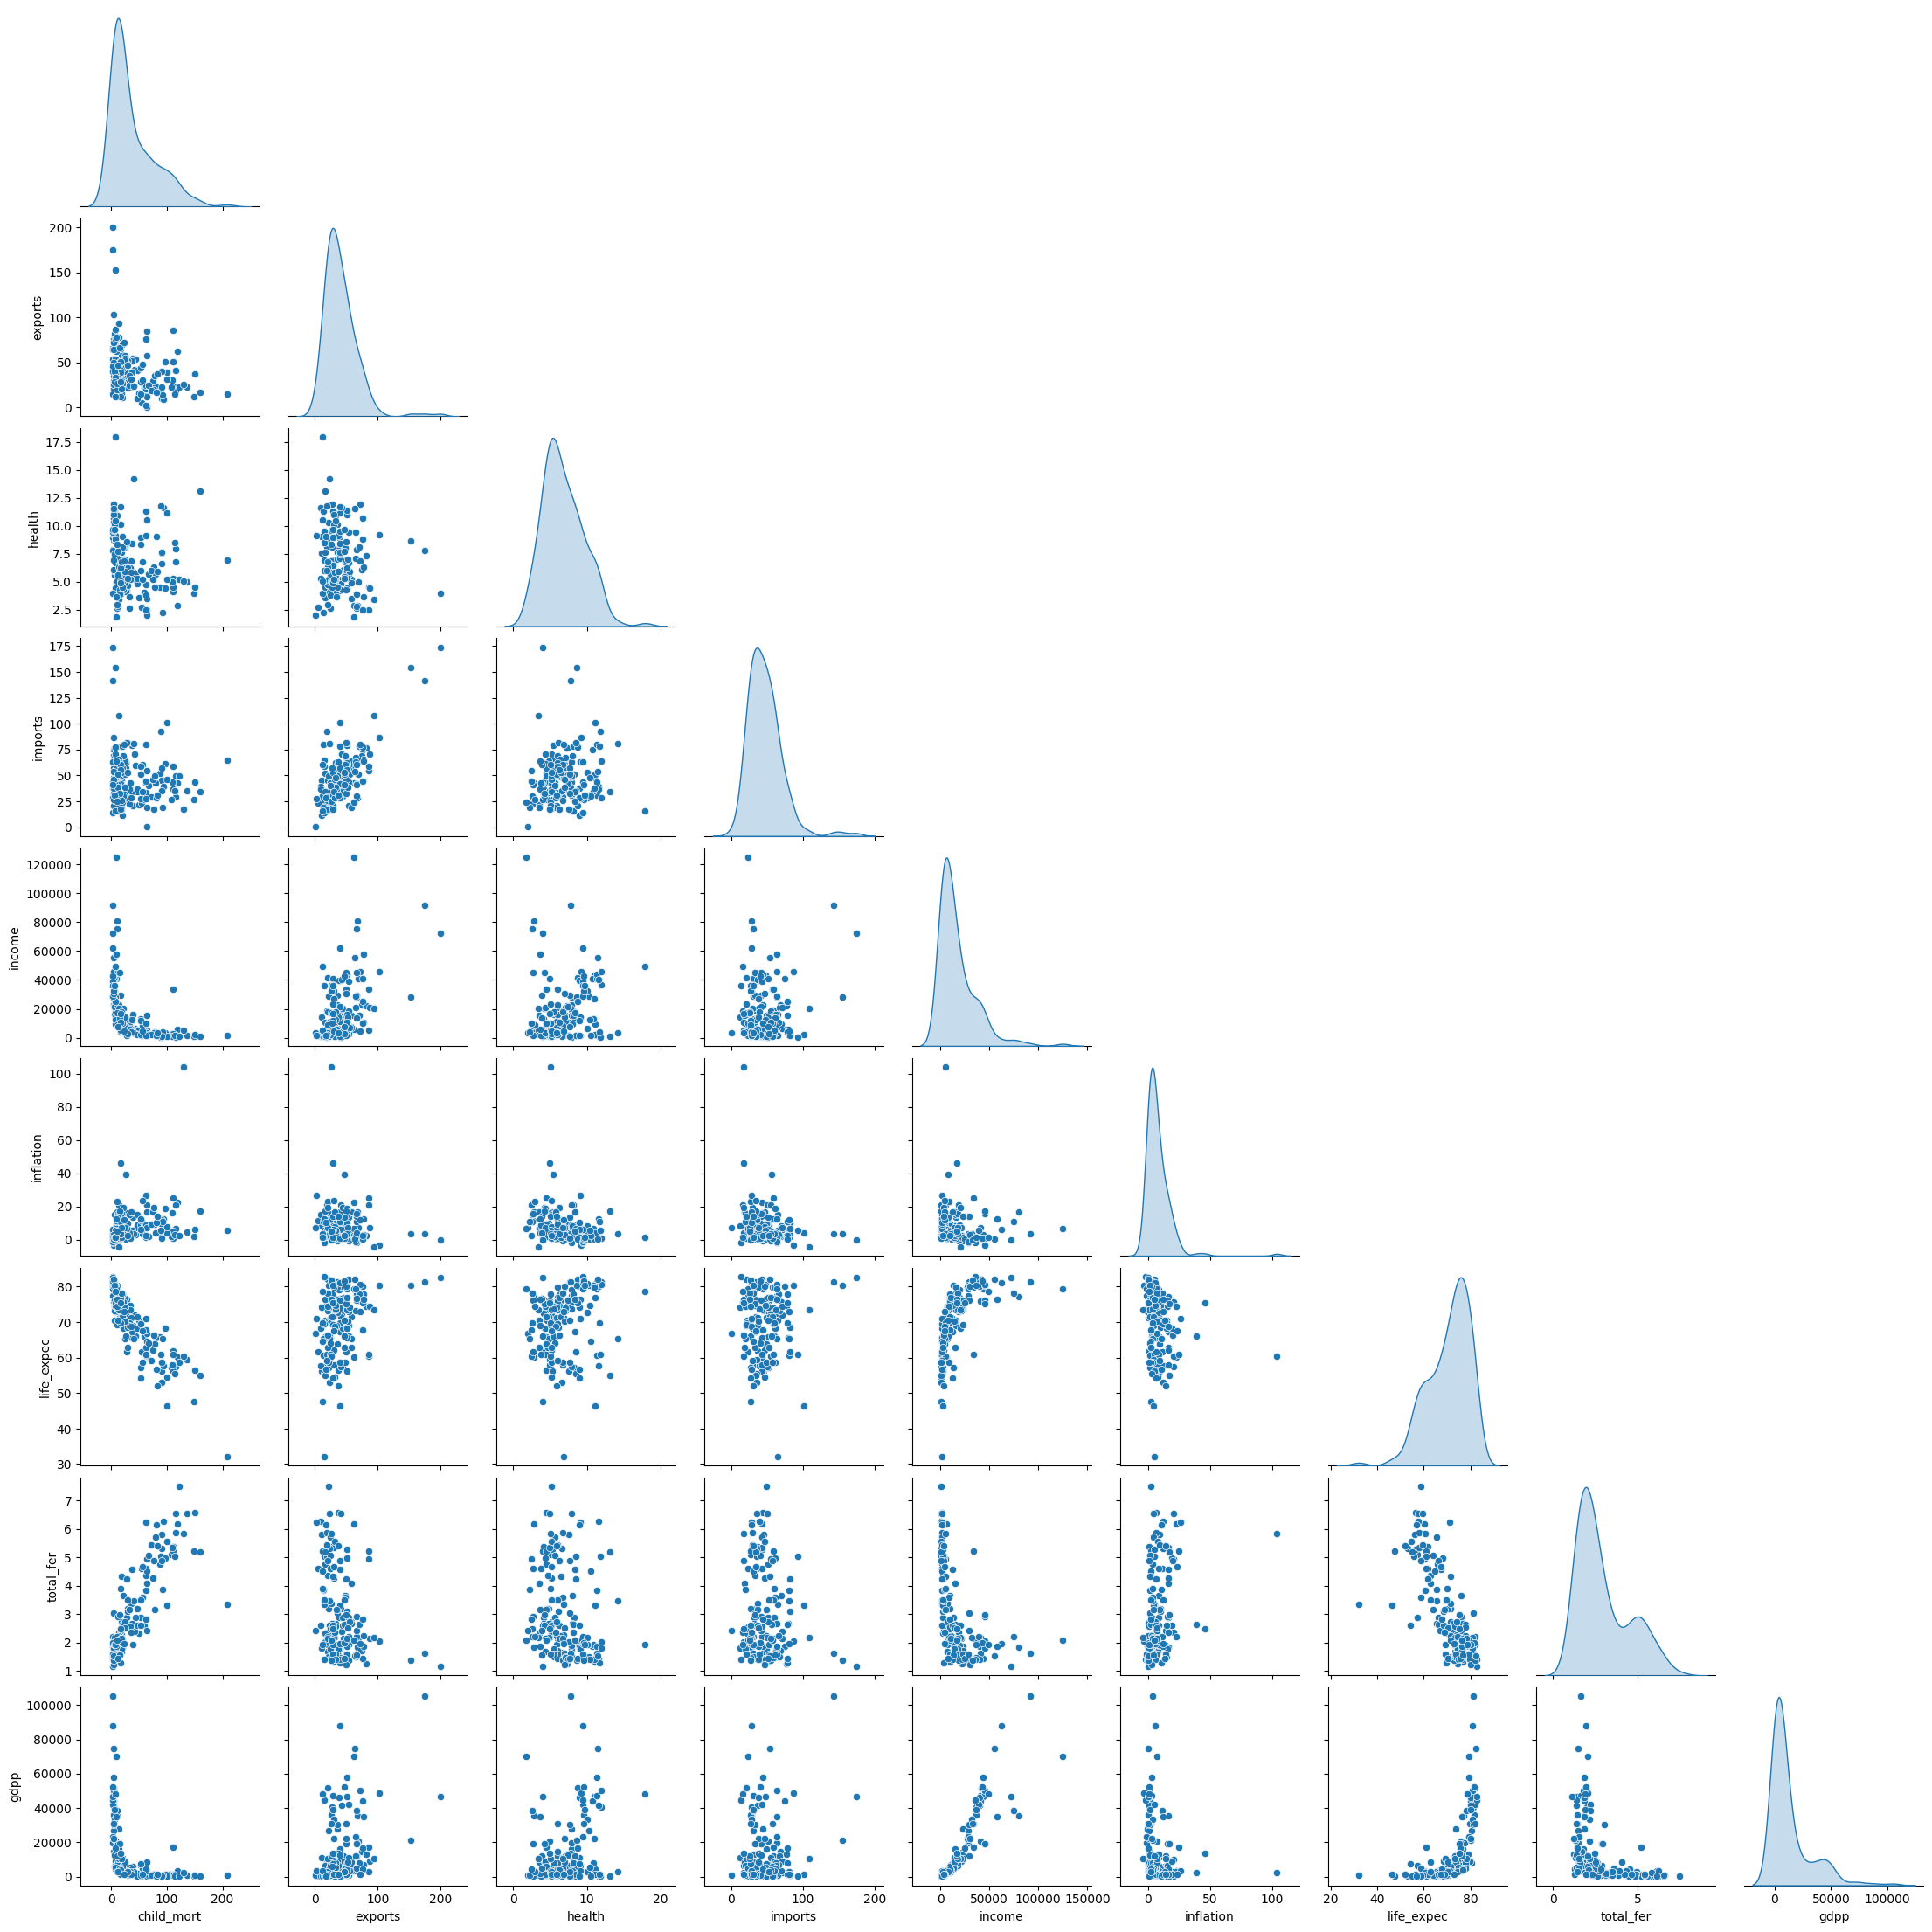

In [177]:
sns.pairplot(country_data, diag_kind = 'kde', corner = True)

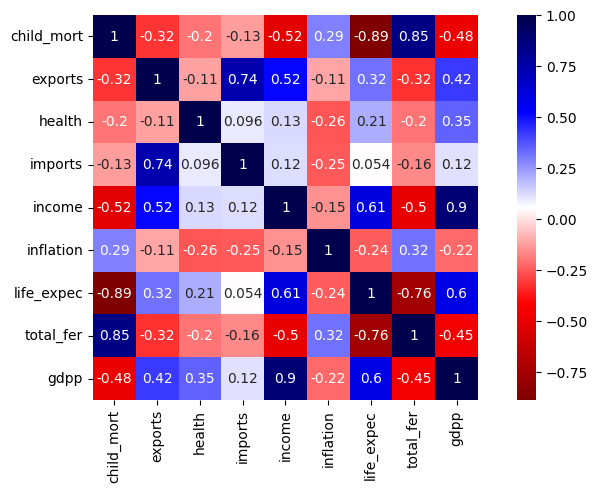

In [180]:
# corr = country_data.corr()
# sns.heatmap(corr, mask = mask, center = 0, cmap = "seismic_r", square = True, annot = True, linewidth = 5)

plt.figure(figsize = (10, 5))
sns.heatmap(country_data.corr(), annot = True, cmap="seismic_r", square = True)
plt.show()

# to save the plot image
# plt.savefig('seismic',dpi=1000)


**FOCUSED ON ASIAN COUNTRY DATA**

In [181]:
# pip install -U kaleido
# pip install plotly
# pip install nbformat
import kaleido
import plotly.express as px
import plotly.io as pio
# pio.renderers

In [183]:
# targeted on Asian Country
for i in country_data.drop('country', axis=1).columns:
    fig = px.choropleth(country_data,
                        locationmode='country names',
                        locations='country',
                        color=i, title=i+' => Asian Country',
                        scope='asia',color_continuous_scale="Greens"
                       )
    #fig.write_html(f"Interactive-plots_Europe_{i}.html")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

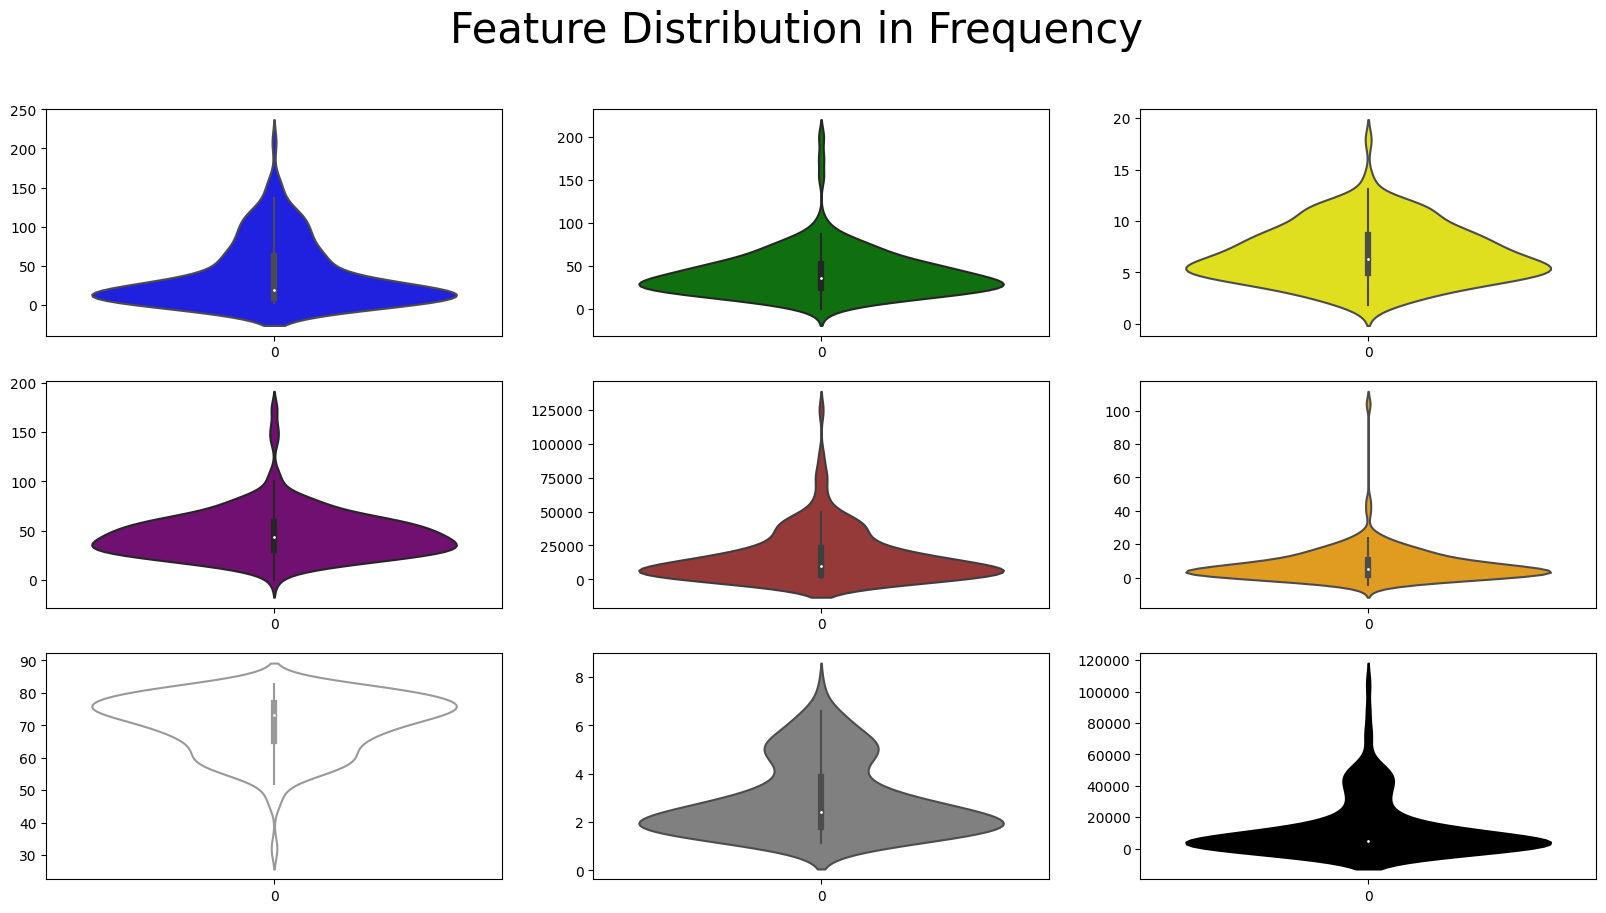

In [184]:
plt.figure(figsize=(20, 10))
plt.suptitle('Feature Distribution in Frequency',size=30)
plt.subplot(3,3,1)
sns.violinplot(country_data.child_mort,color='blue')
plt.subplot(3,3,2)
sns.violinplot(country_data.exports,color='green')
plt.subplot(3,3,3)
sns.violinplot(country_data.health,color='yellow')
plt.subplot(3,3,4)
sns.violinplot(country_data.imports,color='purple')
plt.subplot(3,3,5)
sns.violinplot(country_data.income,color='brown')
plt.subplot(3,3,6)
sns.violinplot(country_data.inflation,color='orange')
plt.subplot(3,3,7)
sns.violinplot(country_data.life_expec,color='white')
plt.subplot(3,3,8)
sns.violinplot(country_data.total_fer,color='gray')
plt.subplot(3,3,9)
sns.violinplot(country_data.gdpp,color='black')
plt.show()

**STANDARDIZATION**

Scaling the Country Data

In [185]:
from sklearn.preprocessing import StandardScaler

In [186]:
scaler=StandardScaler()
country_data_scaled=scaler.fit_transform(country_data.iloc[:,1:])
country_data_scaled=pd.DataFrame(country_data_scaled,columns=country_data.iloc[:,1:].columns, index=country_data.index )
country_data_final=pd.concat([country_data.iloc[:,0],country_data_scaled],axis=1)

In [187]:
country_data_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


**K-MEANS CLUSTERING AND SILHOUETTE SCORE**

In [188]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Silhouettes Score Per Cluster: {2: 0.28735668921406704, 3: 0.28329575683463126, 4: 0.3021082505899252, 5: 0.2992594995920442, 6: 0.23057357437984735, 7: 0.2505950729697856, 8: 0.25154364880466057, 9: 0.22163452012744947} 
 


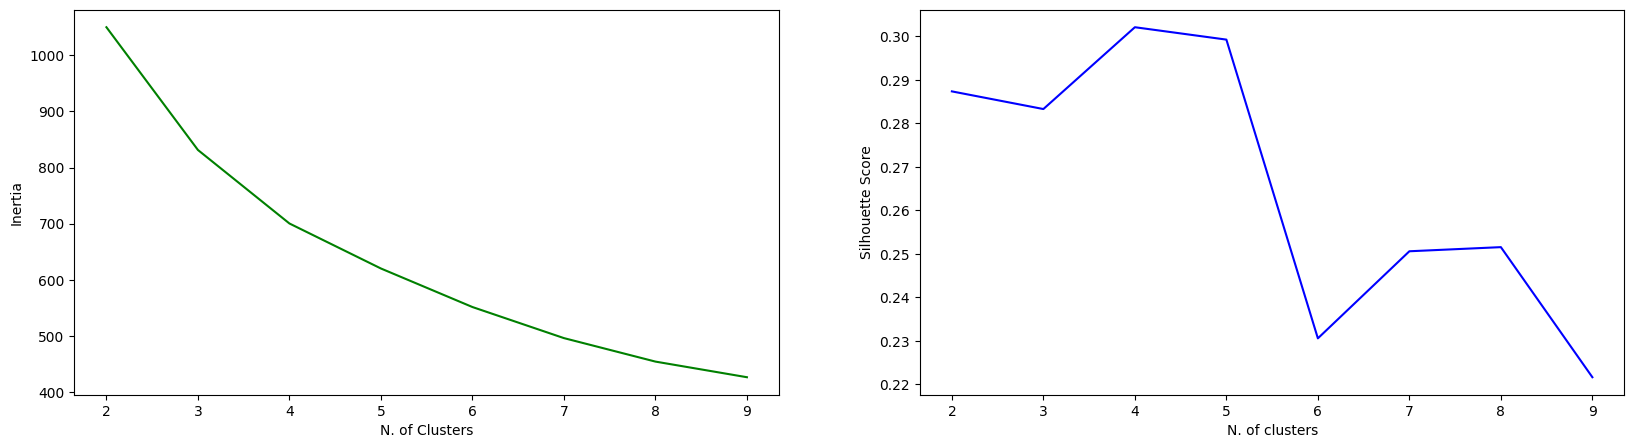

In [189]:
silhouettes={}

inertia = []

range_n_clusters = list(range(2,10,1))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=60)
    kmeans.fit(country_data_final.iloc[:,1:])
    silhouette_avg = silhouette_score(country_data_final.iloc[:,1:], kmeans.labels_)
    inertia.append(kmeans.inertia_)
    silhouettes[num_clusters]=silhouette_avg

# plot the SSDs for each n_clusters
# ssd
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(range_n_clusters,inertia,color='green')
plt.xlabel('N. of Clusters')
plt.ylabel('Inertia')


plt.subplot(1,2,2)
plt.plot(silhouettes.keys(),silhouettes.values(),color='blue')
plt.xlabel('N. of clusters')
plt.ylabel('Silhouette Score')


# inertia: mean squared distance between each instance and its closest centroid
print(f'Silhouettes Score Per Cluster: {silhouettes} \n ')

**CHOOSING OPTIMAL NUMBER OF CLUSTERS**

In [190]:
kmeans = KMeans(n_clusters=3, random_state= 50)
kmeans.fit(country_data_scaled)
print(f' Labels: {kmeans.labels_}')

 Labels: [1 2 2 1 2 2 2 0 0 2 2 0 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 0 0 0 2 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


In [191]:
country_data_labeled=pd.concat([country_data,pd.Series(kmeans.labels_,name='label')],axis=1)

# taking the initial dataset
# the one that it wasn't scaled
country_data_labeled

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


**K-MEANS LABELS PLOTS** 

In [192]:
fig = px.parallel_coordinates(country_data_labeled.iloc[:,1:],title='Features vs Labels: Interactive Plots',color='label')
                             
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(coloraxis_colorbar=dict(title=country_data_labeled['label'].name),
                    legend_title_text='Label', 
                    title_pad_l=300,title_y=0.98)        
fig.show()

In [193]:
# avoid warnings
import warnings 
warnings.filterwarnings('ignore')

In [194]:
country_data_labeled['label'].loc[country_data_labeled['label'] == 2 ]= 'Developing'
country_data_labeled['label'].loc[country_data_labeled['label'] == 1 ]= 'Underdevelopment'
country_data_labeled['label'].loc[country_data_labeled['label'] == 0 ]= 'Developed'

In [195]:
fig = px.choropleth(country_data_labeled[['country','label']],
                    locationmode='country names',
                    locations='country',
                    title='Countries Need Help to Develop (World Wide)',
                    color_discrete_sequence=["red", "yellow", "green"],color=country_data_labeled['label'], 
                    color_discrete_map={'Underdevelopment':'Red', 'Developing':'Yellow', 'Developed':'Green'} )
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text='Labels',legend_title_side='top',title_pad_l=260,title_y=0.86)

fig.show(engine='kaleido')

**CLUSTERING SCATTERPLOTS**

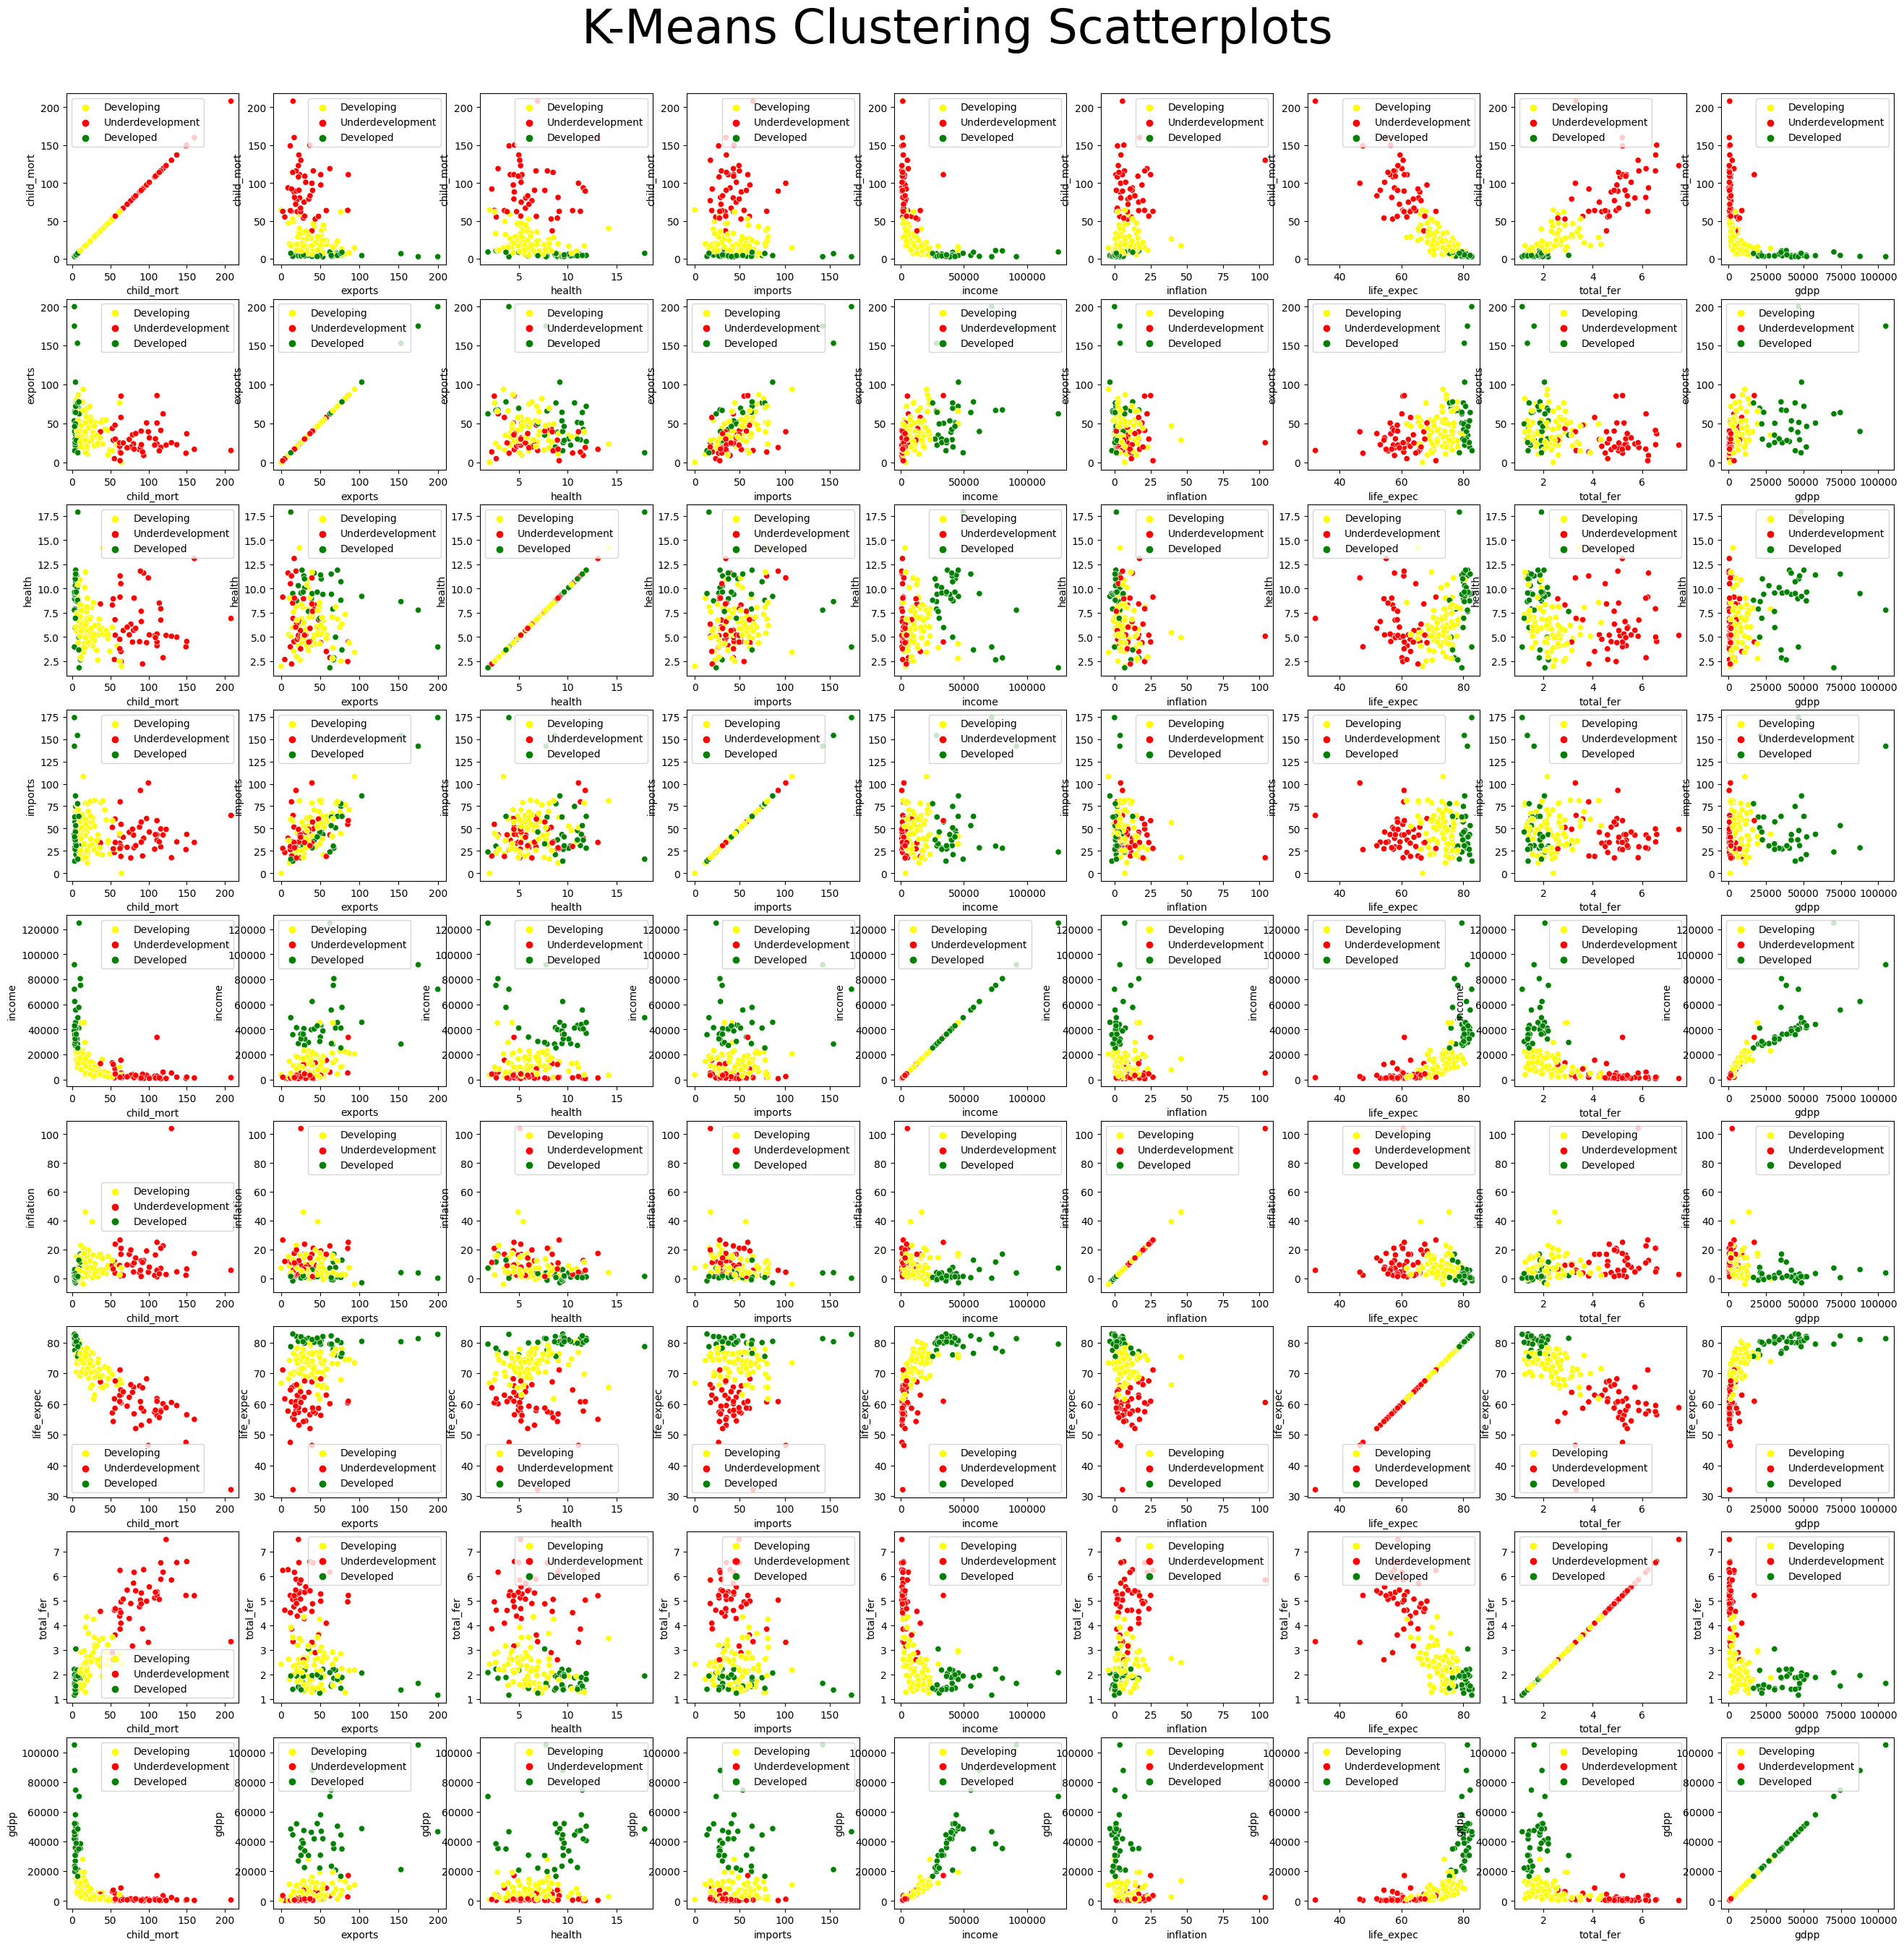

In [196]:
plt.figure(figsize = (40, 40))
plt.suptitle('K-Means Clustering Scatterplots',fontsize=47,y=0.91,x=0.433)
for j in range(len(country_data_labeled.iloc[1:].columns)-2):
    for i in range(len(country_data_labeled.iloc[1:].columns)-2):
        plt.subplot(len(country_data_labeled.iloc[1:].columns),len(country_data_labeled.iloc[1:].columns),i+1+j*len(country_data_labeled.iloc[1:].columns))
        g=sns.scatterplot(x = country_data_labeled.iloc[:,i+1], y = country_data_labeled.iloc[:,j+1], data = country_data_labeled[1:], hue = 'label', palette = ['yellow','red','green'])
        g.legend(fontsize=10)

plt.show()
